In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading the dataset
data = pd.read_csv("/content/CO2_Emissions.csv")

In [4]:
#splitting the data into trainging and testing data
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = data['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting the linear regression model on training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

#predicting the values
y_pred = lr.predict(X_test)

#evaluation matrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 score:", r2)


Mean Squared Error: 422.04096924840013
R2 score: 0.8773003821678078


C.(a) Visualization


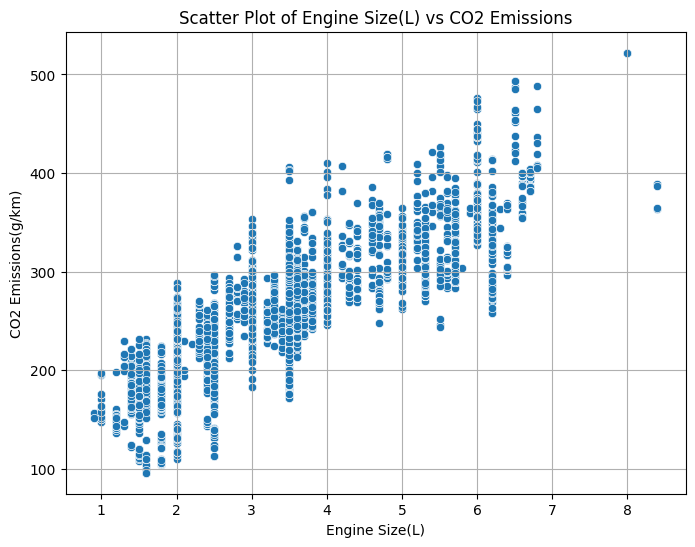

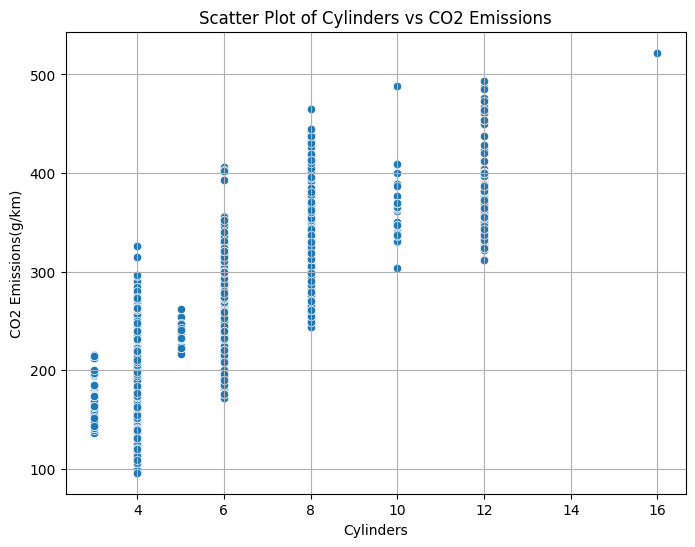

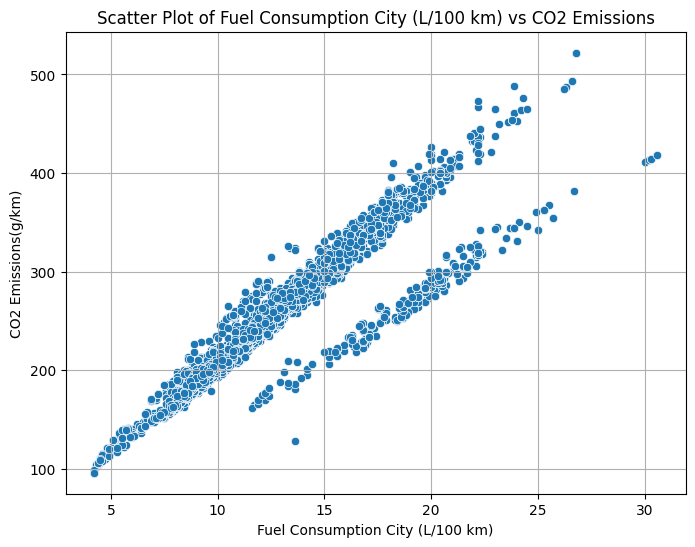

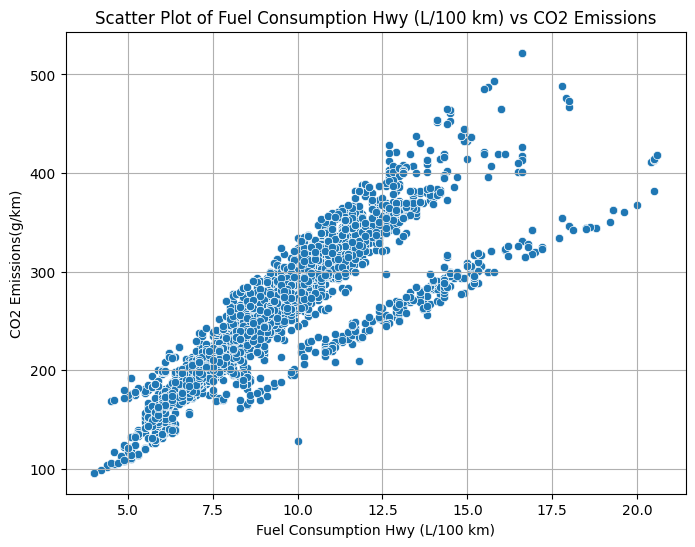

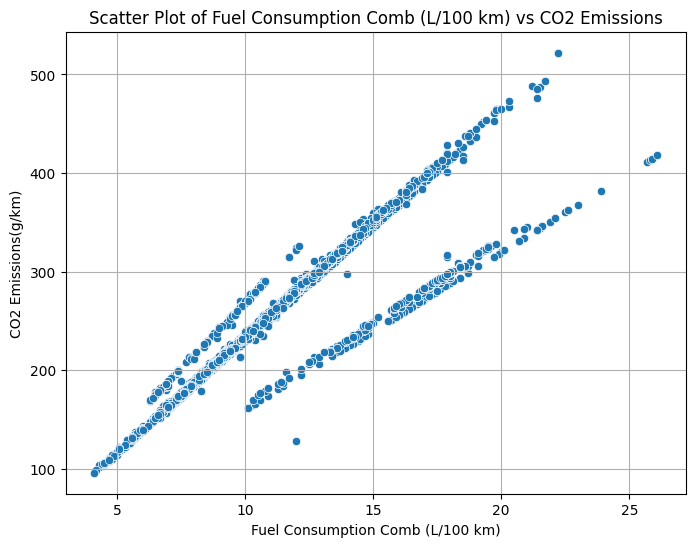

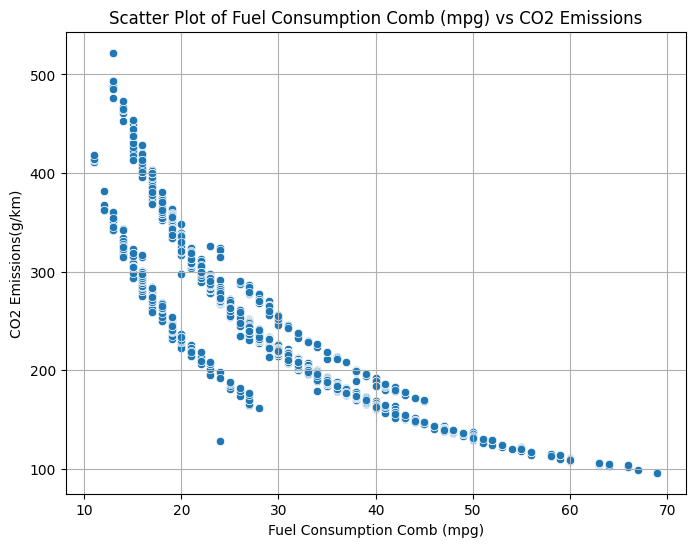

In [6]:
#Scatter plots
# Relevant numerical features
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                      'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# Create separate scatter plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['CO2 Emissions(g/km)'])
    plt.title(f'Scatter Plot of {feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions(g/km)')
    plt.grid(True)
    plt.show()

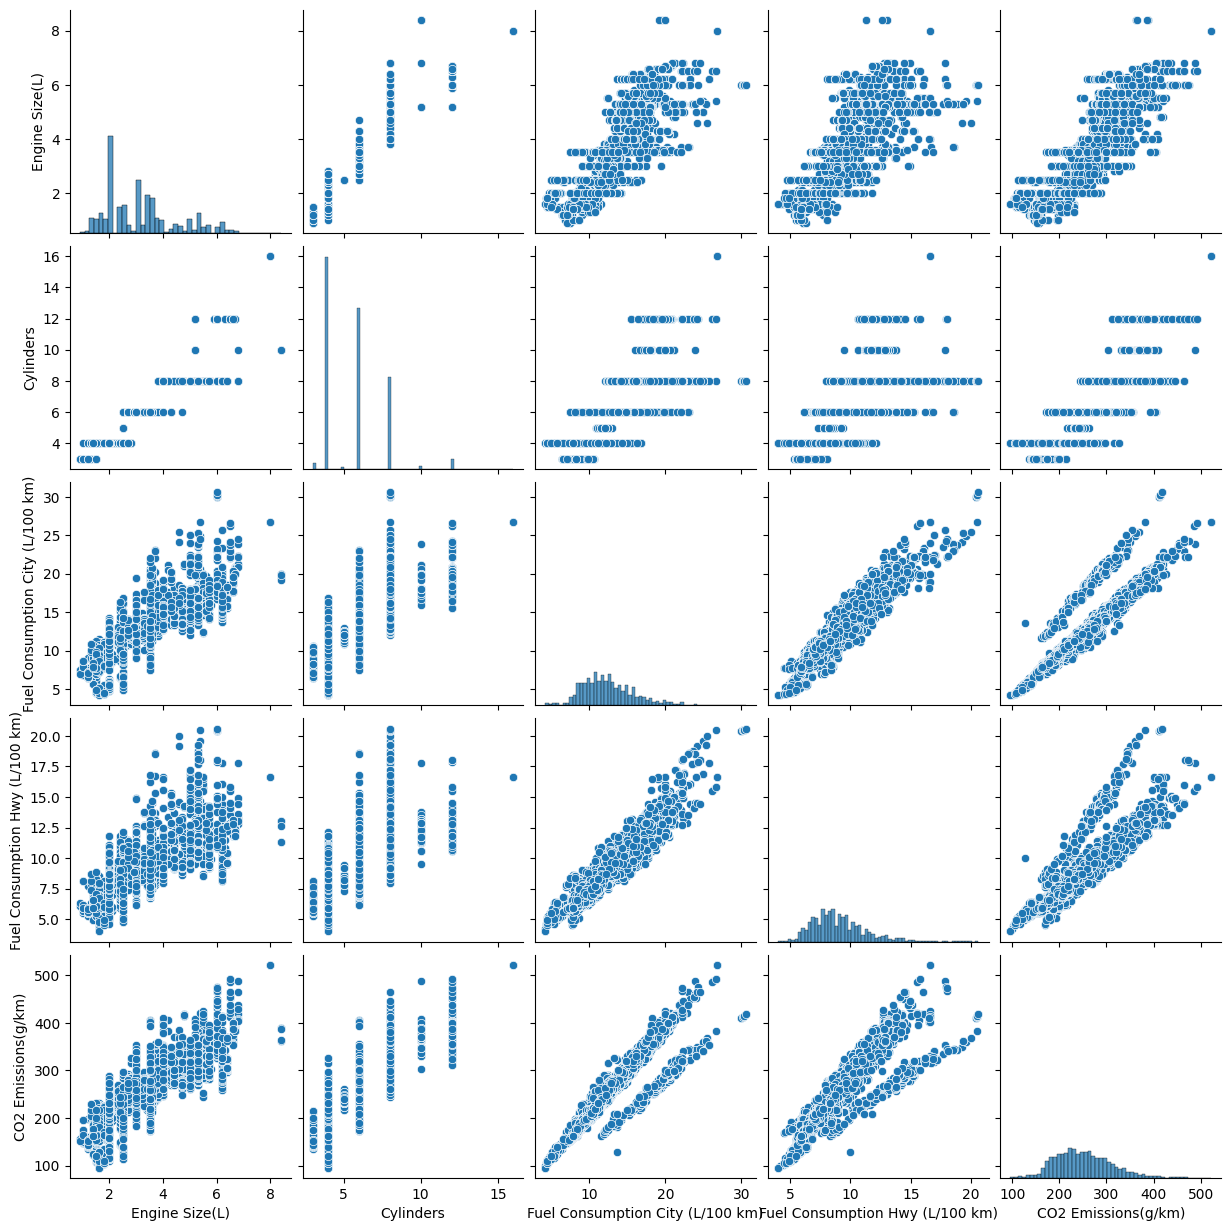

In [8]:
#Pair plots
sns.pairplot(data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)']])
plt.show()

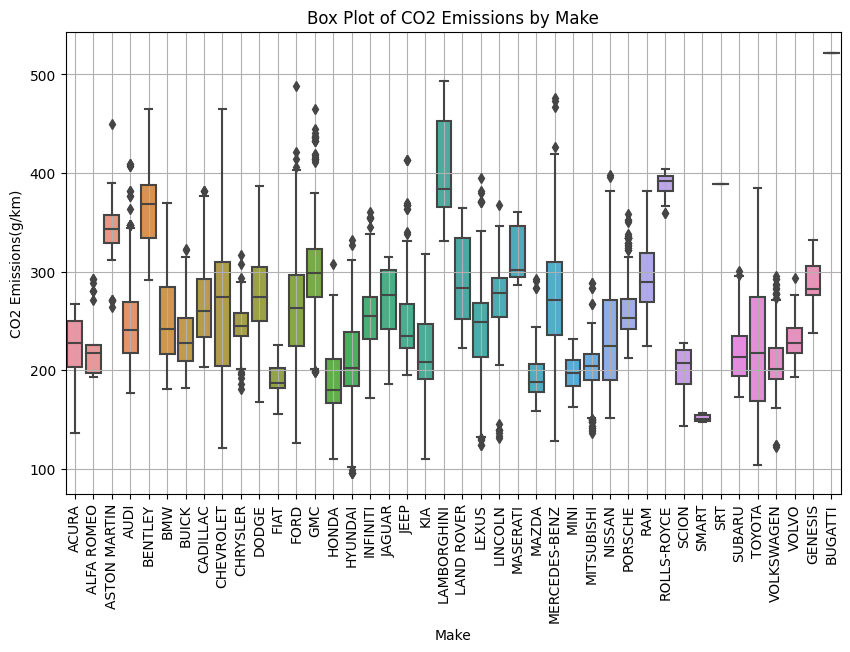

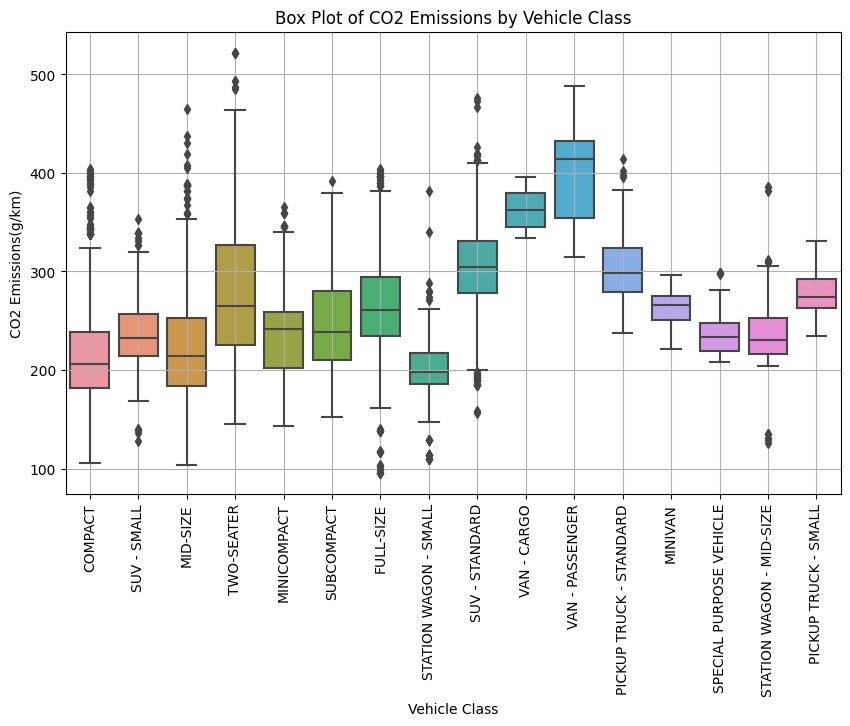

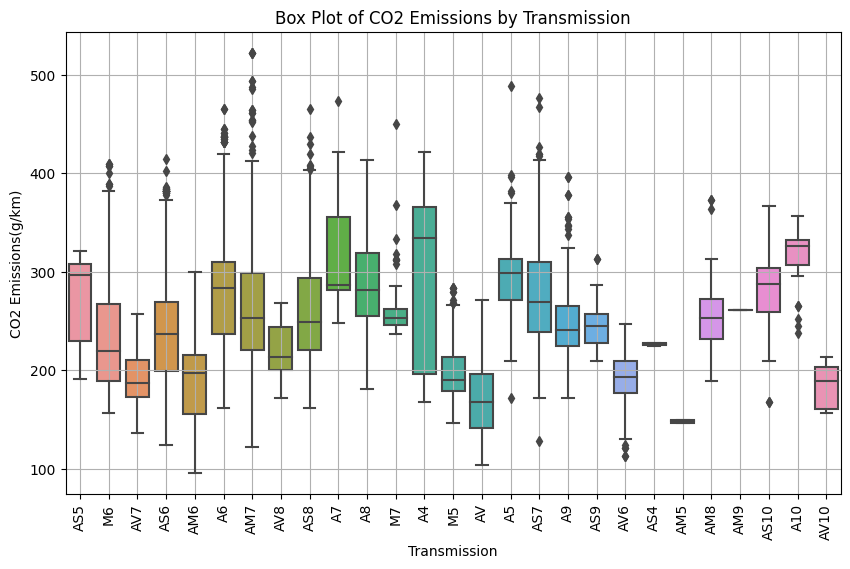

In [10]:
#Box plots
# Relevant categorical features
categorical_features = ['Make', 'Vehicle Class', 'Transmission']

# Create box plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=data)
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of CO2 Emissions by {feature}')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions(g/km)')
    plt.grid(True)
    plt.show()


<ipython-input-11-616732e28fa1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


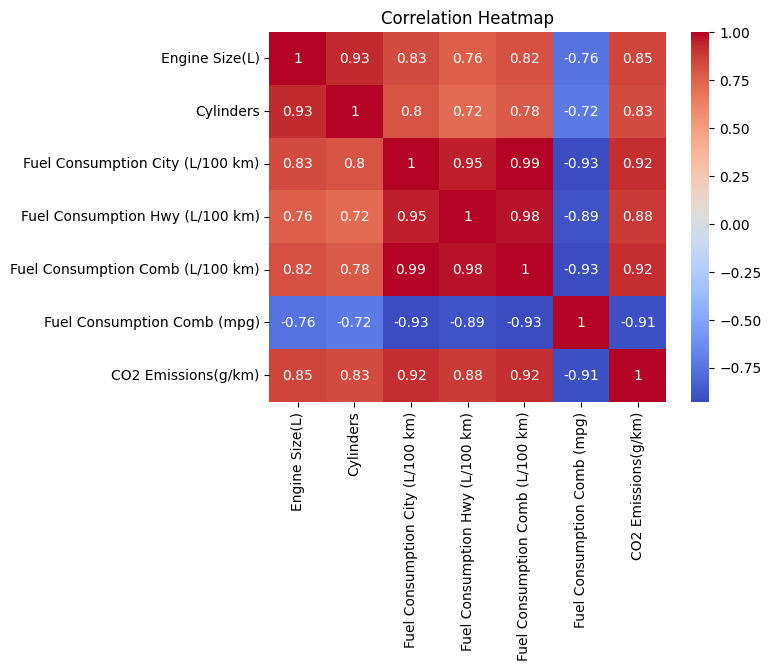

In [11]:
#Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

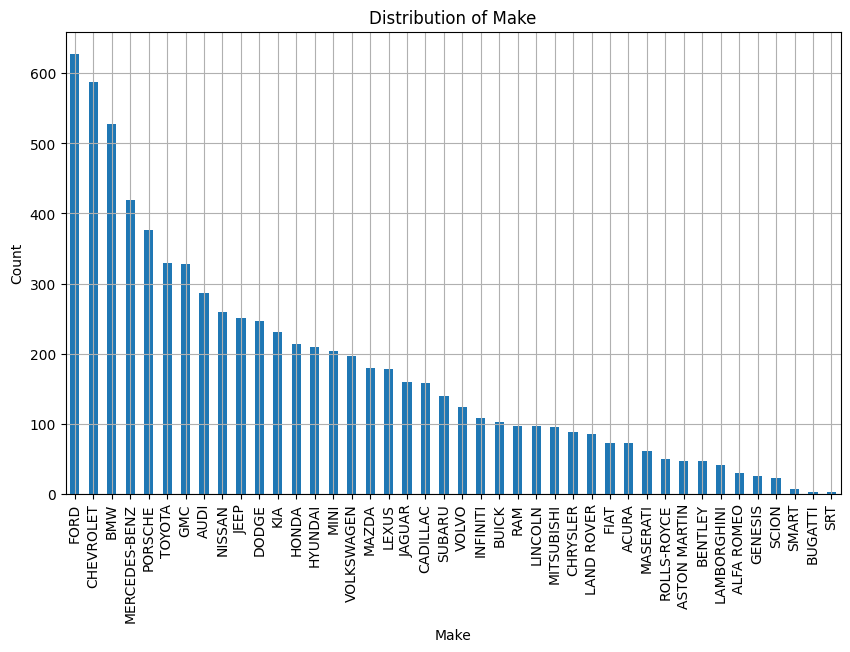

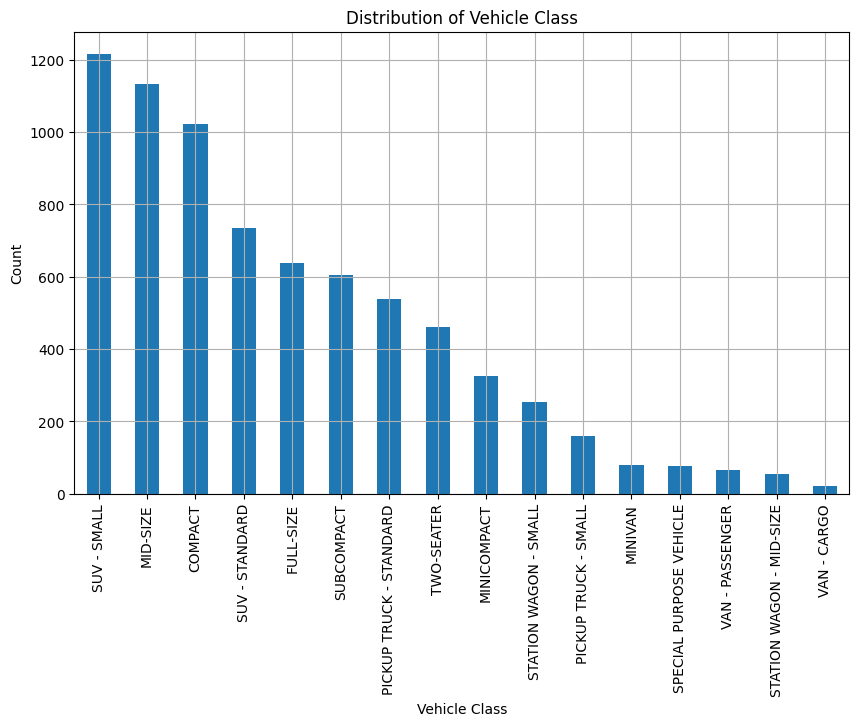

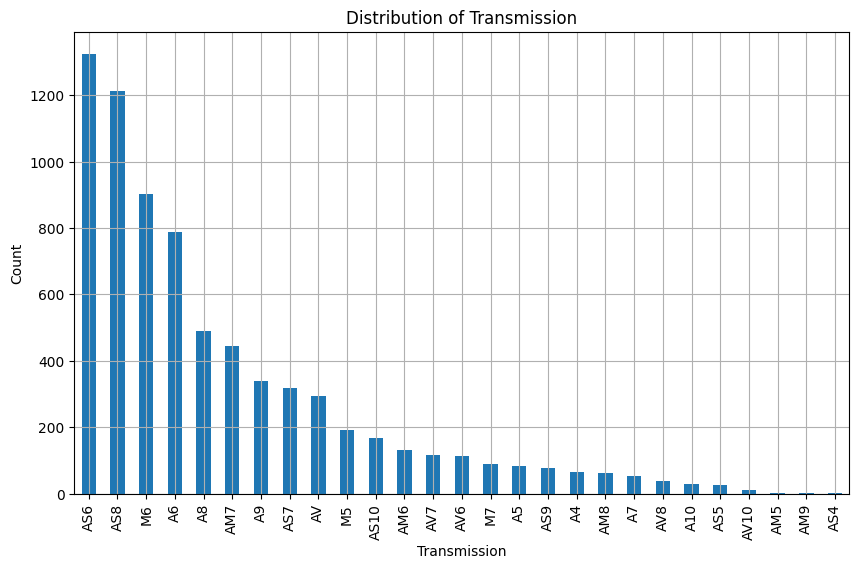

In [12]:
#Histogram
# Relevant categorical features
categorical_features = ['Make', 'Vehicle Class', 'Transmission']

# Create histograms for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    data[feature].value_counts().plot(kind='bar')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

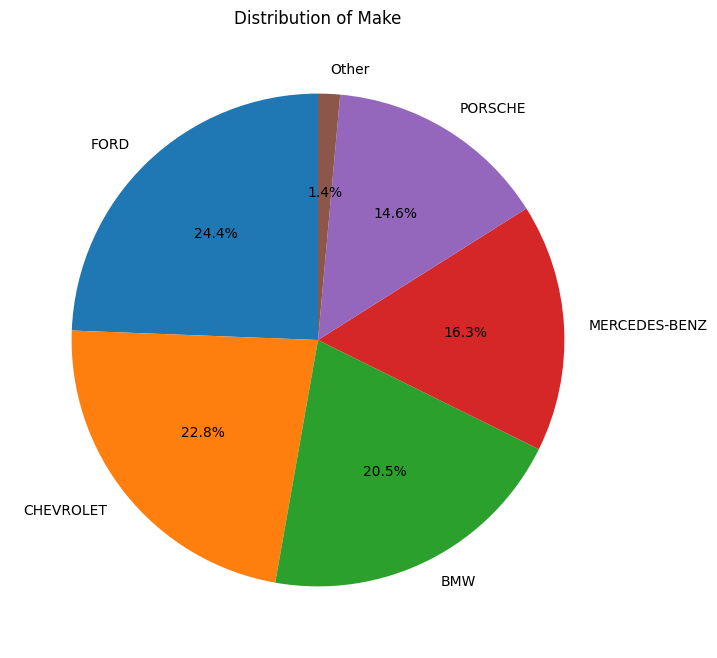

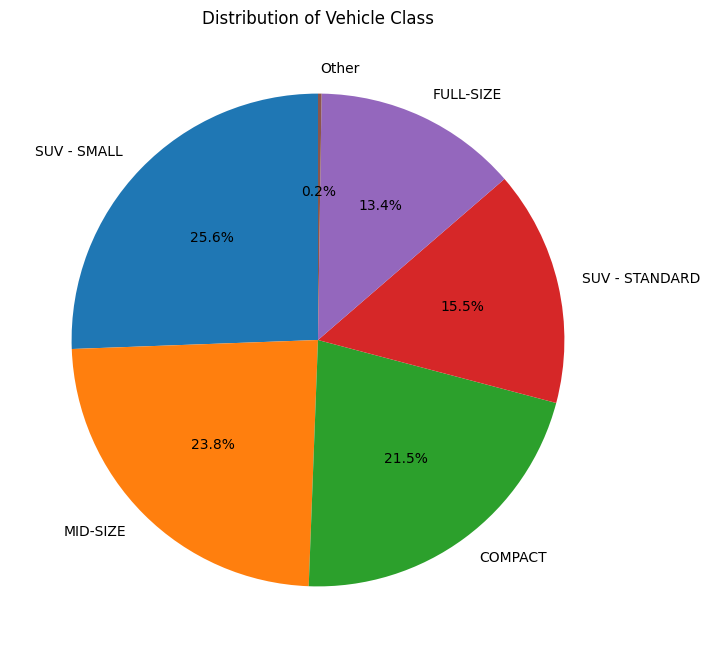

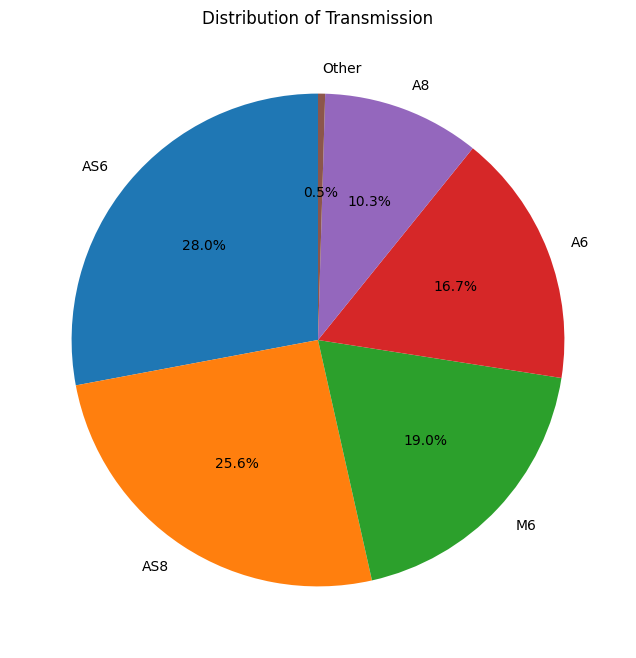

In [13]:
#Pie charts
# Relevant categorical features
categorical_features = ['Make', 'Vehicle Class', 'Transmission']

# Define a threshold for the number of categories to display
category_threshold = 5  # You can adjust this threshold

# Create pie charts for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 8))

    # Filter categories based on the threshold
    value_counts = data[feature].value_counts()
    if len(value_counts) > category_threshold:
        value_counts = value_counts[:category_threshold]
        # Sum the remaining counts and add to 'Other'
        other_count = data[feature].nunique() - category_threshold
        value_counts['Other'] = other_count

    value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()


(b) TSNE (t-distributed stochastic neighbor embedding) algorithm to
reduce data dimensions to 2 and plot the resulting data as a scatter plot.

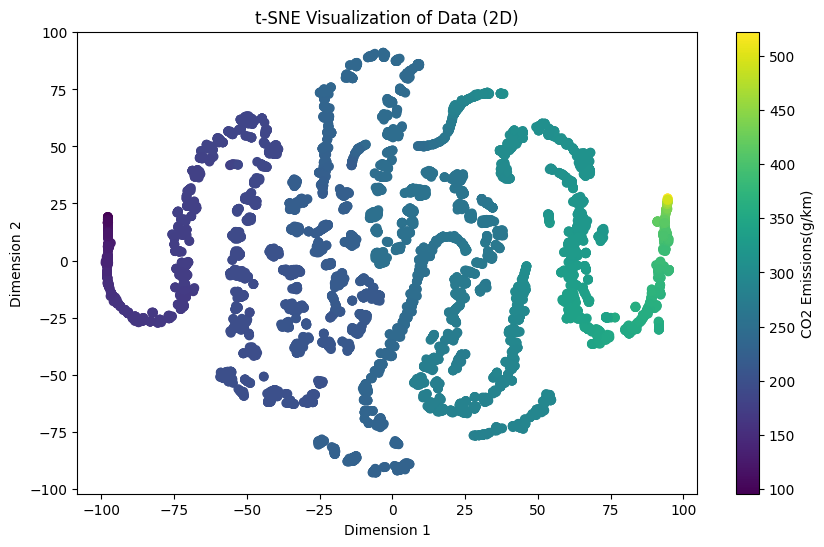

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
# using label encoder
label_encoder = LabelEncoder()
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Vehicle Class'] = label_encoder.fit_transform(data['Vehicle Class'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data['Fuel Type'] = label_encoder.fit_transform(data['Fuel Type'])

# feature extraction
features = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)'
]

X = data[features]

# Applying t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data['CO2 Emissions(g/km)'])
plt.title('t-SNE Visualization of Data (2D)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='CO2 Emissions(g/km)')
plt.show()

(c) Perform the necessary preprocessing steps, and for categorical features use
label-based encoding. Perform linear regression on the preprocessed data. Report
MSE, RMSE, R2 score, Adjusted R2 score, MAE on the train and test data.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Using label encoding
label_encoder = LabelEncoder()
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# target and feature variable
X = data.drop(columns=['CO2 Emissions(g/km)'])
y = data['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# predicting on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evalution metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
mae_test = mean_absolute_error(y_test, y_test_pred)

# result
print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 score: {r2_train}")
print(f"Adjusted R2 score: {adjusted_r2_train}")
print(f"MAE: {mae_train}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 score: {r2_test}")
print(f"Adjusted R2 score: {adjusted_r2_test}")
print(f"MAE: {mae_test}")


Training Metrics:
MSE: 285.9853836055968
RMSE: 16.911102377006557
R2 score: 0.9163430991931094
Adjusted R2 score: 0.9161870228856339
MAE: 10.971129887345068

Testing Metrics:
MSE: 295.3046695124175
RMSE: 17.184431020910104
R2 score: 0.9141463205390628
Adjusted R2 score: 0.9135016854031786
MAE: 11.176630024206899


(d) Use Principal Component Analysis (PCA) on the original dataset to
reduce the number of features and then train the model with the reduced feature
dataset. Vary the number of components, i.e. 4, 6, 8, 10 and compare the results
(MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the train and test dataset.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# using LabelEncoder
label_encoder = LabelEncoder()
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

X = data.drop(columns=['CO2 Emissions(g/km)'])
y = data['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing lists to store results
components_list = [4, 6, 8, 10]
results_train = []
results_test = []

# Iterating over different numbers of components
for n_components in components_list:
    # Applying PCA to reduce the number of features
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # linear regression model
    model = LinearRegression()

    # Fitting the model to the training data with reduced features
    model.fit(X_train_pca, y_train)

    # predicting on training and test data
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    # evalution metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train_pca.shape[0]
    p_train = X_train_pca.shape[1]
    adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test_pca.shape[0]
    p_test = X_test_pca.shape[1]
    adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

    mae_test = mean_absolute_error(y_test, y_test_pred)

    # result
    results_train.append({
        'Components': n_components,
        'MSE ': mse_train,
        'RMSE ': rmse_train,
        'R2 score ': r2_train,
        'Adjusted R2 score ': adjusted_r2_train,
        'MAE ': mae_train,
    })

    results_test.append({
        'Components': n_components,
        'MSE ': mse_test,
        'RMSE ': rmse_test,
        'R2 score ': r2_test,
        'Adjusted R2 score ': adjusted_r2_test,
        'MAE ': mae_test,
    })


results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

print("Results for Training Data: \n")
print(results_train_df.to_string(index=False))

print("\nResults for Test Data: \n")
print(results_test_df.to_string(index=False))

Results for Training Data: 

 Components       MSE      RMSE   R2 score   Adjusted R2 score       MAE 
          4 449.592108 21.203587   0.868485            0.868395 13.578719
          6 372.046956 19.288519   0.891168            0.891058 11.041965
          8 288.902620 16.997136   0.915490            0.915375 11.037484
         10 286.008679 16.911791   0.916336            0.916194 10.972986

Results for Test Data: 

 Components       MSE      RMSE   R2 score   Adjusted R2 score       MAE 
          4 459.577714 21.437764   0.866387            0.866024 13.751154
          6 379.928265 19.491749   0.889544            0.889093 11.161448
          8 298.175420 17.267757   0.913312            0.912839 11.337186
         10 295.400126 17.187208   0.914119            0.913533 11.179583


(e) Encode the categorical features of the original dataset with one-hot en
coding and perform all tasks of part c again, i.e. apply linear regression and report
MSE, RMSE etc. Compare the results obtained with part c.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# one-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'])

X = data_encoded.drop(columns=['CO2 Emissions(g/km)'])
y = data_encoded['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# predicting on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evalution metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
mae_test = mean_absolute_error(y_test, y_test_pred)

# result
print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 score: {r2_train}")
print(f"Adjusted R2 score: {adjusted_r2_train}")
print(f"MAE: {mae_train}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 score: {r2_test}")
print(f"Adjusted R2 score: {adjusted_r2_test}")
print(f"MAE: {mae_test}")


Training Metrics:
MSE: 8.534807704092737
RMSE: 2.9214393206248075
R2 score: 0.9975033844299824
Adjusted R2 score: 0.9960757029877345
MAE: 1.8700774030743537

Testing Metrics:
MSE: 9.516010017640354e+18
RMSE: 3084803075.990484
R2 score: -2766581629577682.5
Adjusted R2 score: 6067569814645857.0
MAE: 154341710.1760071


(f) Perform PCA on the one-hot encoded dataset and choose the appropriate
number of components (try 5 different values). Compare the results (MSE, RMSE,
R2 score, Adjusted R2 score, MAE) on the train and test dataset.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# one-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'])

X = data_encoded.drop(columns=['CO2 Emissions(g/km)'])
y = data_encoded['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing lists to store results
components_list = [5,10,15,20,25]
results_train = []
results_test = []

for n_components in components_list:
    # Applying PCA to reduce the number of features
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # linear regression model
    model = LinearRegression()

    # Fitting the model to the training data with reduced features
    model.fit(X_train_pca, y_train)

    # predicting on training and test data
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    # evalution metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train_pca.shape[0]
    p_train = X_train_pca.shape[1]
    adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test_pca.shape[0]
    p_test = X_test_pca.shape[1]
    adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # result
    results_train.append({
        'Components': n_components,
        'MSE ': mse_train,
        'RMSE ': rmse_train,
        'R2 score ': r2_train,
        'Adjusted R2 score ': adjusted_r2_train,
        'MAE ': mae_train,
    })

    results_test.append({
        'Components': n_components,
        'MSE ': mse_test,
        'RMSE ': rmse_test,
        'R2 score ': r2_test,
        'Adjusted R2 score ': adjusted_r2_test,
        'MAE ': mae_test,
    })

results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

print("Results for Training Data: \n")
print(results_train_df.to_string(index=False))

print("\nResults for Test Data: \n")
print(results_test_df.to_string(index=False))

Results for Training Data: 

 Components       MSE      RMSE   R2 score   Adjusted R2 score       MAE 
          5 323.087725 17.974641   0.905490            0.905410 11.374992
         10 322.056139 17.945923   0.905792            0.905632 11.355811
         15 294.166631 17.151287   0.913950            0.913731 11.279614
         20 277.676404 16.663625   0.918774            0.918498 11.316220
         25 251.947452 15.872853   0.926300            0.925987 10.997723

Results for Test Data: 

 Components       MSE      RMSE   R2 score   Adjusted R2 score       MAE 
          5 332.057209 18.222437   0.903461            0.903133 11.479313
         10 331.133532 18.197075   0.903730            0.903073 11.478456
         15 296.746682 17.226337   0.913727            0.912841 11.488574
         20 278.009726 16.673624   0.919174            0.918064 11.383701
         25 252.799112 15.899658   0.926504            0.925238 11.055356


(g) Use L1 and L2 regularization while training the linear model (use the
preprocessed dataset of part c). Compare the MSE, RMSE, R2 score, Adjusted R2
score, and MAE on the test dataset for both regularization techniques.


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# using LabelEncoder
label_encoder = LabelEncoder()
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

X = data.drop(columns=['CO2 Emissions(g/km)'])
y = data['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 regularization (lasso)
lasso_model = Lasso(alpha=1.0)
# L2 regularization (ridge)
ridge_model = Ridge(alpha=1.0)

# Fitting the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Fitting the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# predicting on the test data for both models
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)

# evalution metrics for L1 regularization
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)
n = X_test.shape[0]
p = X_test.shape[1]
lasso_adjusted_r2 = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)

# evalution metrics for L2 regularization
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_adjusted_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

# results
print("L1 Regression Metrics:\n")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print(f"R2 score: {lasso_r2}")
print(f"Adjusted R2 score: {lasso_adjusted_r2}")
print(f"MAE: {lasso_mae}")

print("\nL2 Regression Metrics:\n")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R2 score: {ridge_r2}")
print(f"Adjusted R2 score: {ridge_adjusted_r2}")
print(f"MAE: {ridge_mae}")


L1 Regression Metrics:

MSE: 297.7487370752064
RMSE: 17.255397331710633
R2 score: 0.9134357588216913
Adjusted R2 score: 0.9127857884101135
MAE: 11.181694466187157

L2 Regression Metrics:

MSE: 295.31176290765717
RMSE: 17.184637409839556
R2 score: 0.9141442582822004
Adjusted R2 score: 0.9134996076617936
MAE: 11.176715381125966


(h) Use SGDRegressor library to perform linear regression on the preprocessed dataset of part c. Report the evaluation metrics and compare the results.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor


# using LabelEncoder
label_encoder = LabelEncoder()
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

X = data.drop(columns=['CO2 Emissions(g/km)'])
y = data['CO2 Emissions(g/km)']

# Split the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SGDRegressor model
sgd_regressor = SGDRegressor(max_iter=1000, random_state=42)

# Fitting the model to the training data
sgd_regressor.fit(X_train, y_train)

# predicting on training and test data
y_train_pred = sgd_regressor.predict(X_train)
y_test_pred = sgd_regressor.predict(X_test)

# evalution metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# result
print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R2 score: {r2_train}")
print(f"MAE: {mae_train}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R2 score: {r2_test}")
print(f"MAE: {mae_test}")


Training Metrics:
MSE: 1.1205432563603771e+29
RMSE: 334745165216822.4
R2 score: -3.27783101588328e+25
MAE: 291049899453688.5

Testing Metrics:
MSE: 1.1220488055080207e+29
RMSE: 334969969625341.3
R2 score: -3.2621231031215525e+25
MAE: 291816860046683.9
